In [1]:
#import all related library
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gathering Data
#### 1. twitter-archive-enhanced.csv data

In [2]:
twi_arch=pd.read_csv('twitter-archive-enhanced.csv')
twi_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2.Tsv file - Image Predictions

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), 'wb') as file:
    file.write(response.content)
    
# Put Image Predictions into predi
predi = pd.read_csv('image_predictions.tsv', sep = '\t')
predi.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. DATA from Twitter API

In [4]:
# Load Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twi_arch['tweet_id'].values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
            print(tweet_id)
        except tweepy.TweepError:
            print('Error: tweet missing')

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
Error: tweet missing
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
8820458700

Rate limit reached. Sleeping for: 778


828361771580813312
828046555563323392
828011680017821696
827933404142436356
827653905312006145
827600520311402496
827324948884643840
Error: tweet missing
827199976799354881
826958653328592898
826848821049180160
826615380357632002
826598799820865537
826598365270007810
826476773533745153
826240494070030336
826204788643753985
826115272272650244
825876512159186944
825829644528148480
825535076884762624
825147591692263424
825120256414846976
825026590719483904
824796380199809024
824775126675836928
824663926340194305
824325613288833024
824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
8211534218

Rate limit reached. Sleeping for: 782


773704687002451968
773670353721753600
773547596996571136
773336787167145985
773308824254029826
773247561583001600
773191612633579521
772877495989305348
772826264096874500
772615324260794368
772581559778025472
772193107915964416
772152991789019136
772117678702071809
772114945936949249
772102971039580160
771908950375665664
771770456517009408
771500966810099713
771380798096281600
771171053431250945
771136648247640064
771102124360998913
771014301343748096
771004394259247104
770787852854652928
770772759874076672
Error: tweet missing
770655142660169732
770414278348247044
770293558247038976
770093767776997377
770069151037685760
769940425801170949
769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
7667149219

714251586676113411
714214115368108032
714141408463036416
713919462244790272
713909862279876608
713900603437621249
713761197720473600
713411074226274305
713177543487135744
713175907180089344
712809025985978368
712717840512598017
712668654853337088
712438159032893441
712309440758808576
712097430750289920
712092745624633345
712085617388212225
712065007010385924
711998809858043904
711968124745228288
711743778164514816
711732680602345472
711694788429553666
711652651650457602
711363825979756544
711306686208872448
711008018775851008
710997087345876993
710844581445812225
710833117892898816
710658690886586372
710609963652087808
710588934686908417
710296729921429505
710283270106132480
710272297844797440
710269109699739648
710153181850935296
710140971284037632
710117014656950272
709918798883774466
709901256215666688
709852847387627521
709566166965075968
709556954897764353
709519240576036864
709449600415961088
709409458133323776
709225125749587968
709207347839836162
709198395643068416
709179584944

683391852557561860
683357973142474752
683142553609318400
683111407806746624
683098815881154561
683078886620553216
683030066213818368
682962037429899265
682808988178739200
682788441537560576
682750546109968385
682697186228989953
682662431982772225
682638830361513985
682429480204398592
682406705142087680
682393905736888321
682389078323662849
682303737705140231
682259524040966145
682242692827447297
682088079302213632
682059653698686977
682047327939461121
682032003584274432
682003177596559360
681981167097122816
681891461017812993
681694085539872773
681679526984871937
681654059175129088
681610798867845120
681579835668455424
681523177663676416
681340665377193984


Rate limit reached. Sleeping for: 686


681339448655802368
681320187870711809
681302363064414209
681297372102656000
681281657291280384
681261549936340994
681242418453299201
681231109724700672
681193455364796417
680970795137544192
680959110691590145
680940246314430465
680934982542561280
680913438424612864
680889648562991104
680836378243002368
680805554198020098
680801747103793152
680798457301471234
680609293079592961
680583894916304897
680497766108381184
680494726643068929
680473011644985345
680440374763077632
680221482581123072
680206703334408192
680191257256136705
680176173301628928
680161097740095489
680145970311643136
680130881361686529
680115823365742593
680100725817409536
680085611152338944
680070545539371008
Error: tweet missing
679877062409191424
679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
6794628231

670385711116361728
670374371102445568
670361874861563904
670338931251150849
670319130621435904
670303360680108032
670290420111441920
670093938074779648
670086499208155136
670079681849372674
670073503555706880
670069087419133954
670061506722140161
670055038660800512
670046952931721218
670040295598354432
670037189829525505
670003130994700288
669993076832759809
669972011175813120
669970042633789440
669942763794931712
669926384437997569
669923323644657664
669753178989142016
669749430875258880
669684865554620416
669683899023405056
669682095984410625
669680153564442624
669661792646373376
669625907762618368
669603084620980224
669597912108789760
669583744538451968
669573570759163904
669571471778410496
669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781

In [8]:
df_list = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list.append({'tweet_id': tweet_line['id'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count']})
        
twi_api = pd.DataFrame(df_list)

# Assessing Data
#### 1. Assessing Twitter Archive Data

In [9]:
#Visual Assessment
twi_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
#Programatic assessment
twi_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twi_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#Check if any duplicated tweet id
sum(twi_arch.tweet_id.duplicated())

0

In [14]:
#Checking dogs'names
twi_arch['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Tucker           10
Lola             10
Winston           9
Bo                9
the               8
Sadie             8
Daisy             7
an                7
Toby              7
Bailey            7
Buddy             7
Milo              6
Scout             6
Rusty             6
Oscar             6
Jax               6
Jack              6
Stanley           6
Leo               6
Bella             6
Dave              6
Koda              6
Bentley           5
               ... 
Obie              1
Shelby            1
Tessa             1
Duchess           1
Petrick           1
Evy               1
Siba              1
Ole               1
Cleopatricia      1
Batdog            1
Harnold           1
Lucky             1
Sully             1
Nigel             1
Jeb               1
Eazy              1
Aiden             1
Ambrose           1
Beckham           1


In [18]:
#Check if any rating rater in the text column
twi_arch[twi_arch['text'].str.contains('\d+\.\d+/\d+')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [19]:
#Check rating_numerator value
twi_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
twi_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# Look for tweets where the rating denominator is not 10
twi_arch[twi_arch['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [22]:
# check the number of retweets 
len((twi_arch[twi_arch['text'].str.startswith('RT') == True]))

183

In [27]:
sum(twi_arch.in_reply_to_status_id.notnull())

78

In [25]:
# Find name included in the text column but not in the name column
twi_arch[twi_arch['text'].str.contains('names are|name to')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None


In [28]:
twi_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
# check if there is tweets without image
sum(twi_arch['expanded_urls'].isnull())

59

#### 2. Assessing Image predictions data

In [30]:
#Visual Assessment 
predi.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
predi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
predi.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
sum(predi['tweet_id'].duplicated())

0

In [36]:
predi.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [37]:
predi['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### 2. Assessing twitter API data

In [38]:
#Visual assessment 
twi_api.head()

,favorites,retweets,tweet_id
0,37666,8213,892420643555336193
1,32354,6072,892177421306343426
2,24369,4015,891815181378084864
3,40981,8369,891689557279858688
4,39181,9072,891327558926688256


In [39]:
twi_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorites    2339 non-null int64
retweets     2339 non-null int64
tweet_id     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [41]:
twi_api.describe()

,favorites,retweets,tweet_id
count,2339.000000,2339.000000,2.339000e+03
mean,7877.066695,2893.964515,7.421620e+17
std,12207.142149,4880.849664,6.828729e+16
min,0.000000,1.000000,6.660209e+17
25%,1364.000000,581.500000,6.783378e+17
50%,3424.000000,1351.000000,7.186133e+17
75%,9645.500000,3371.500000,7.986907e+17
max,162631.000000,82745.000000,8.924206e+17


In [42]:
twi_api.isnull().any()

favorites    False
retweets     False
tweet_id     False
dtype: bool

#### Note of the issues
Quality Issues:
* Tweet_id, timestamp, sources, img_num and dog_stages are not in the right data type
* Remove redundant word for source definition
* Some dog's name is not right
* 183 retweets needs to be deleted
* Some denominators are not equal 10
* Some numerators are less than 10
* Some tweets don't include images
* There is inconsistency regarding letter cases for some breeds in p1, p2, and p3 from Image Prediction File 

Tidiness Issues:
* Merge the three dataframes into one by using tweet_id
* Combine 4 dog stages into a single column

In [44]:
# Before cleaning, copies of the original data
twi_arch_clean = twi_arch.copy()
predi_clean = predi.copy()
twi_api_clean = twi_api.copy()

# Cleaning Data
#### 1. Tidiness issue 1 Redundant dataframe
#### Define
> Merge the three dataframes into one
> Using pd.merge()

#### Code

In [45]:
# Join twi_arch and twi_api based on tweet_id
df = pd.merge(twi_arch_clean, twi_api_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Join df with predi_clean
df2 = pd.merge(df, predi_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

#### Test

In [46]:
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
favorites                     2066 

In [48]:
# Save new dataset 
df2.to_csv('twi_arch_master.csv', index=False)

In [56]:
#Read the data
master_arch = pd.read_csv('twi_arch_master.csv')

In [57]:
master_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### 1. Tidiness issue 2 Redundant columns
#### Define
>Combine 4 dog stages into a single column

#### Code

In [58]:
# Create and merge dog stages into one column
master_arch['dog_stages'] = master_arch.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the unnecessary columns
master_arch.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [59]:
master_arch.dog_stages.value_counts()

pupper     231
doggo       75
puppo       29
floofer      3
Name: dog_stages, dtype: int64

In [69]:
master_arch['dog_stages']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28      pupper
29         NaN
         ...  
2036       NaN
2037       NaN
2038       NaN
2039       NaN
2040       NaN
2041       NaN
2042       NaN
2043       NaN
2044       NaN
2045       NaN
2046       NaN
2047       NaN
2048       NaN
2049       NaN
2050       NaN
2051       NaN
2052       NaN
2053       NaN
2054       NaN
2055       NaN
2056       NaN
2057       NaN
2058       NaN
2059       NaN
2060       NaN
2061       NaN
2062       NaN
2063       NaN
2064       NaN
2065       NaN
Name: dog_stages, Length: 2066, dtype: category
Categories (4, object): [doggo, floof

In [60]:
#Delete the not useful columns.
master_arch.drop(['in_reply_to_status_id','in_reply_to_user_id',
                  'retweeted_status_id','retweeted_status_user_id',
                  'retweeted_status_timestamp'], axis=1, inplace=True)

In [61]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 22 columns):
tweet_id              2066 non-null int64
timestamp             2066 non-null object
source                2066 non-null object
text                  2066 non-null object
expanded_urls         2066 non-null object
rating_numerator      2066 non-null int64
rating_denominator    2066 non-null int64
name                  2066 non-null object
favorites             2066 non-null int64
retweets              2066 non-null int64
jpg_url               2066 non-null object
img_num               2066 non-null int64
p1                    2066 non-null object
p1_conf               2066 non-null float64
p1_dog                2066 non-null bool
p2                    2066 non-null object
p2_conf               2066 non-null float64
p2_dog                2066 non-null bool
p3                    2066 non-null object
p3_conf               2066 non-null float64
p3_dog                2066 non-null bool

#### Quality Issues 1 Wrong datatype for some columns
#### Define 
> Tweet_id, timestamp, sources, img_num and dog_stages are not in the right data type
> Should get the right data type for these columns 

#### Code

In [62]:
master_arch['tweet_id'] = master_arch['tweet_id'].astype(str)
master_arch['timestamp'] = pd.to_datetime(master_arch['timestamp'])
master_arch['source'] = master_arch['source'].astype('category')
master_arch['img_num'] = master_arch['img_num'].astype('category')
master_arch['dog_stages'] = master_arch['dog_stages'].astype('category')

#### Test

In [63]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 22 columns):
tweet_id              2066 non-null object
timestamp             2066 non-null datetime64[ns]
source                2066 non-null category
text                  2066 non-null object
expanded_urls         2066 non-null object
rating_numerator      2066 non-null int64
rating_denominator    2066 non-null int64
name                  2066 non-null object
favorites             2066 non-null int64
retweets              2066 non-null int64
jpg_url               2066 non-null object
img_num               2066 non-null category
p1                    2066 non-null object
p1_conf               2066 non-null float64
p1_dog                2066 non-null bool
p2                    2066 non-null object
p2_conf               2066 non-null float64
p2_dog                2066 non-null bool
p3                    2066 non-null object
p3_conf               2066 non-null float64
p3_dog                2066

#### Quality Issues 2 Redundant word before source
#### Define 
>Remove redundant word(hashtag) before the source definition

#### Code

In [64]:
import re

href_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return href_tags.sub('', text)

master_arch['source'] = master_arch['source'].apply(remove_tags)

#### Test

In [65]:
master_arch['source'].value_counts()

Twitter for iPhone    2026
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

#### Quality Issues 3 Some dog's name is not right
#### Define 
> Replace name that are likely not real such as 'a', 'an','this' 

In [66]:
names = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for dname in names:
    master_arch.loc[master_arch.name == dname, 'name'] = None

#### Test

In [68]:
master_arch['name'].value_counts()

Oliver       10
Penny        10
Cooper       10
Lucy         10
Charlie      10
Tucker       10
Lola          8
Winston       8
Sadie         8
Bo            8
Toby          7
Daisy         7
Rusty         6
Bailey        6
Koda          6
Scout         6
Jax           6
Stanley       6
Dave          6
Bella         6
Milo          6
Louis         5
Chester       5
Buddy         5
Larry         5
Oscar         5
Alfie         5
Leo           5
Clarence      4
Cassie        4
             ..
Sid           1
Bronte        1
Brutus        1
Caryl         1
Jazzy         1
Lance         1
Bert          1
Rueben        1
Jennifur      1
Jiminus       1
Patch         1
Sprinkles     1
Frönq         1
Brady         1
Sephie        1
Bilbo         1
Willy         1
Sparky        1
Kollin        1
Gustav        1
Jaspers       1
Lacy          1
Tiger         1
Tug           1
Arya          1
Lugan         1
Ashleigh      1
Beemo         1
Lizzie        1
Taco          1
Name: name, Length: 922,

#### Quality issues 4 Remove the retweets
#### Define 
> Some retweets starting with 'RT' in the text column. We need to phase them out

#### Code

In [74]:
master_arch = master_arch.loc[master_arch['text'].str.startswith('RT') == False]

#### Test

In [75]:
master_arch.loc[master_arch['text'].str.startswith('RT') == True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages


#### Quality Issues 5 Some denominators are not equal 10
#### Define 
>Removing multiple cases of where the denominator of rating '!=' 10 by pd.drop()

#### Code

In [80]:
master_arch.drop(master_arch.loc[master_arch['rating_denominator']!=10].index, 
                 axis=0, inplace=True)

#### Test

In [81]:
master_arch['rating_denominator'].value_counts()

10    1972
Name: rating_denominator, dtype: int64

In [82]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 2065
Data columns (total 22 columns):
tweet_id              1972 non-null object
timestamp             1972 non-null datetime64[ns]
source                1972 non-null category
text                  1972 non-null object
expanded_urls         1972 non-null object
rating_numerator      1972 non-null int64
rating_denominator    1972 non-null int64
name                  1355 non-null object
favorites             1972 non-null int64
retweets              1972 non-null int64
jpg_url               1972 non-null object
img_num               1972 non-null category
p1                    1972 non-null object
p1_conf               1972 non-null float64
p1_dog                1972 non-null bool
p2                    1972 non-null object
p2_conf               1972 non-null float64
p2_dog                1972 non-null bool
p3                    1972 non-null object
p3_conf               1972 non-null float64
p3_dog                1972

#### Quality Issues 6 Some numerators are less than 10
#### Define 
> Some numerators are higher than 10
> Remove the rows whoes the numerator of rating < 10.

### Code

In [83]:
master_arch.drop(master_arch.loc[master_arch['rating_numerator'] <10].index, 
                 axis=0, inplace=True)

#### Test

In [84]:
master_arch['rating_numerator'].value_counts()

12      449
10      417
11      396
13      260
14       35
1776      1
420       1
75        1
27        1
26        1
Name: rating_numerator, dtype: int64

In [85]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 2060
Data columns (total 22 columns):
tweet_id              1562 non-null object
timestamp             1562 non-null datetime64[ns]
source                1562 non-null category
text                  1562 non-null object
expanded_urls         1562 non-null object
rating_numerator      1562 non-null int64
rating_denominator    1562 non-null int64
name                  1102 non-null object
favorites             1562 non-null int64
retweets              1562 non-null int64
jpg_url               1562 non-null object
img_num               1562 non-null category
p1                    1562 non-null object
p1_conf               1562 non-null float64
p1_dog                1562 non-null bool
p2                    1562 non-null object
p2_conf               1562 non-null float64
p2_dog                1562 non-null bool
p3                    1562 non-null object
p3_conf               1562 non-null float64
p3_dog                1562

#### Quality Issue 7 Some tweets don't include images
#### Define
> Remove all tweets that don't include any image.

#### Code 

In [86]:
master_arch = master_arch.dropna(subset=['expanded_urls'])

#### Test

In [87]:
master_arch['expanded_urls'].isnull().any()

False

#### Quality Issues 8 inconsistency regarding letter cases for some breeds
#### Define
> Change first letter for some breeds into lowercase.

#### Code

In [88]:
master_arch['p1'] = master_arch['p1'].str.lower()
master_arch['p2'] = master_arch['p2'].str.lower()
master_arch['p3'] = master_arch['p3'].str.lower()

#### Test

In [103]:
print(sum(master_arch['p1'].str.isupper()))
print(sum(master_arch['p2'].str.isupper()))
print(sum(master_arch['p3'].str.isupper()))

0
0
0


# Save the New Clean Dataset

In [104]:
master_arch.to_csv('twitter_archive_master.csv', index=False)

# Analyzing & Visualizing Data

In [4]:
# Read the cleaned data
master_arch = pd.read_csv('twitter_archive_master.csv')

#### Q1: What is the most common of the dog stages

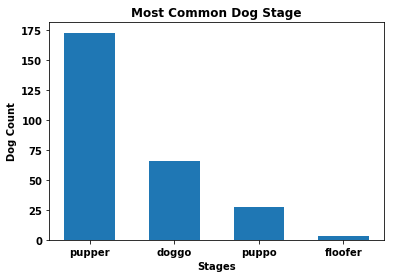

In [5]:
master_arch['dog_stages'].value_counts()
dog_type = ['pupper', 'doggo', 'puppo', 'floofer']
dog_counts = [173, 66, 27, 3]

fig,ax = plt.subplots()
ax.bar(dog_type, dog_counts, width = 0.6)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Stages')
plt.title("Most Common Dog Stage")
plt.show()

Regardless of the missing data, we could see the pupper is the most popular ones among the data we known. 

#### Q2: Which breed is the most popular based on the favorites and likes data

In [27]:
dog_favorites = master_arch.groupby('p1')['favorites'].sum().sort_values(ascending=False)
#List top 8
dog_favorites=dog_favorites[:8]
dog_favorites

p1
golden_retriever      1528688
labrador_retriever    1028702
pembroke               947150
chihuahua              647400
samoyed                493451
french_bulldog         443944
chow                   394717
pomeranian             295204
Name: favorites, dtype: int64

In [25]:
dog_retweets = master_arch.groupby('p1')['retweets'].sum().sort_values(ascending=False)
dog_retweets=dog_retweets[:8]
dog_retweets

p1
golden_retriever      440850
labrador_retriever    327385
pembroke              258743
chihuahua             205041
samoyed               162480
chow                  111070
french_bulldog        110890
pomeranian            101644
Name: retweets, dtype: int64

In [52]:
df=pd.concat([dog_retweets, dog_favorites], axis=1)
df

,retweets,favorites
chihuahua,205041,647400
chow,111070,394717
french_bulldog,110890,443944
golden_retriever,440850,1528688
labrador_retriever,327385,1028702
pembroke,258743,947150
pomeranian,101644,295204
samoyed,162480,493451


In [53]:
df.sort_values(by=['retweets','favorites'], inplace=True)

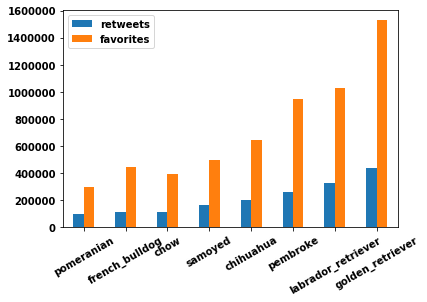

In [55]:
df.plot.bar(rot=30);

Based on the data, the golden retriever is the most popular ones.

#### Q3 Where do the tweets come from?

Text(0.5,1,'Percentage of sources')

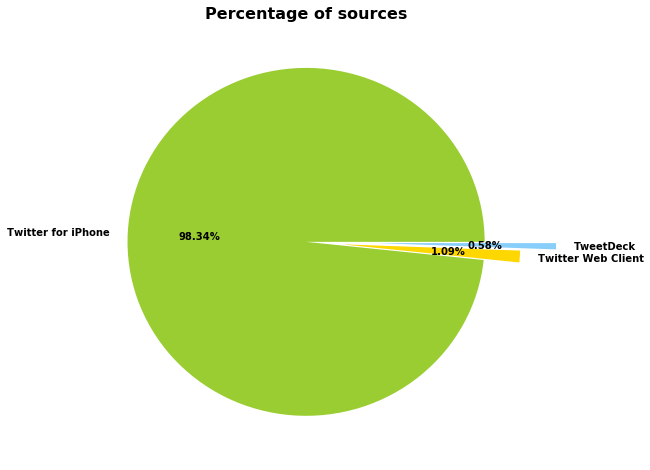

In [59]:
sources = master_arch['source'].value_counts()
explode = np.linspace(0,0.4,3)
colors = ['yellowgreen', 'gold', 'lightskyblue']
sources.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Percentage of sources', weight='bold', fontsize=16)

#### Q4 What are the ratings of the dog

In [62]:
master_arch['rating']=master_arch['rating_numerator']/master_arch['rating_denominator']
master_arch['rating'].value_counts()

1.2      449
1.0      417
1.1      396
1.3      260
1.4       35
2.6        1
2.7        1
177.6      1
42.0       1
7.5        1
Name: rating, dtype: int64

In [63]:
master_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 23 columns):
tweet_id              1562 non-null int64
timestamp             1562 non-null object
source                1562 non-null object
text                  1562 non-null object
expanded_urls         1562 non-null object
rating_numerator      1562 non-null int64
rating_denominator    1562 non-null int64
name                  1102 non-null object
favorites             1562 non-null int64
retweets              1562 non-null int64
jpg_url               1562 non-null object
img_num               1562 non-null int64
p1                    1562 non-null object
p1_conf               1562 non-null float64
p1_dog                1562 non-null bool
p2                    1562 non-null object
p2_conf               1562 non-null float64
p2_dog                1562 non-null bool
p3                    1562 non-null object
p3_conf               1562 non-null float64
p3_dog                1562 non-null bool

#### Q5  Is there any relationship between likes and retweets?

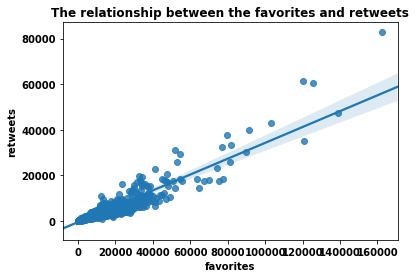

In [65]:
sns.regplot('favorites','retweets', data=master_arch)
plt.title('The relationship between the favorites and retweets');

Based on above graph, we can see a strong positive correlation between retweets and favorites